# More image processing with ```OpenCV```

In [2]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

We're going to start by seeing more ways that we can manipulate images using ```OpenCV```.

In [3]:
# load our dino pal
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))

#define width and height
width = image.shape[1] 
height = image.shape[0]

__Rotation__

To rotate about a point, we first need to define that point and then use the function ```cv2.getRotationMatrix2D```.

This function takes the following arguments:

```cv2.getRotationMatrix2D((x_point, y_point), angle, scale)```

In [22]:
M = cv2.getRotationMatrix2D((width/2, height/2), -45, 2) #rotating -45 degrees around the center of the image

* (x_point, y_point) = TUPLE
* angle -> how many degrees we want to rotate (angle of image)
* scale -> scale of the image

In [23]:
print(M.shape)
print(M)

(2, 3)
[[   1.41421356   -1.41421356   88.7329727 ]
 [   1.41421356    1.41421356 -294.70771953]]


In [24]:
rotated = cv2.warpAffine(image, M, (width, height))

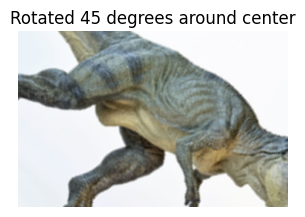

In [25]:
jimshow(rotated, "Rotated 45 degrees around center")

Image itself is not modified with rotation - we are saving it to a new variable "rotated": 

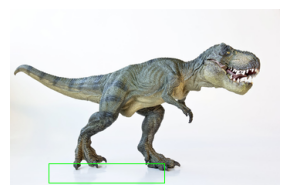

In [35]:
jimshow(image)

__Translation__

In [36]:
# load our dino pal
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))
width = image.shape[1]
height = image.shape[0]

To *translate* an image, there is no specific built-in function with ```OpenCV``` to define a translation matrix. 

Instead, we need to define then translation matrix we want to use.

We can do that using ```numpy```.

In [37]:
M = np.float64([[1, 0, 25],
                [0, 1, 50]])

We can then use the ```cv2.warpAffine()``` function to translate our image.

There's some tricky maths involved here - for the mathematically inclined, you can read more [here](https://people.computing.clemson.edu/~dhouse/courses/401/notes/affines-matrices.pdf)

But the crucial point is that we're essentially multiplying together the original image by the translation matrix ```M``` that we've just defined, which results in a modified image being created.

In [38]:
shifted = cv2.warpAffine(image, M, (width, height)) #same as the one we used for rotation

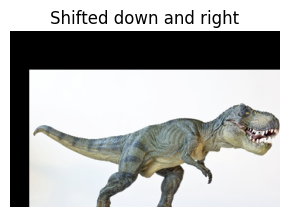

In [39]:
jimshow(shifted, "Shifted down and right")

## Drawing

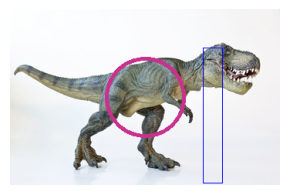

In [51]:
# cv2.rectangle(image, start_point, end_point, color, thickness)
cv2.rectangle(image, pt1 = (250, 50), pt2 = (275, 225), color = (255,0,0), thickness = 1) #using cv 2, draw rectangle, starting at point 50 on x-axis, and 200 y axis. End point on 200 x-axis and 225 on y-axis
jimshow(image)

__Draw circle__

In [42]:
(centerX, centerY) = (width // 2, height // 2) #define center.x and y. "//" is floor division = gives us the round division

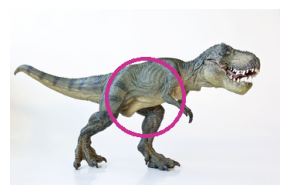

In [53]:
# cv2.circl(image, cent_coords, radio, colour, thickness)
cv2.circle(image, (centerX, centerY), 50, (143,50,200), 3) #defining a thickness as -1 it fills the whole picture!
jimshow(image)

**NOTE:** Drawing on images is *destructive*! It modifies the image in place and can't easily be removed. 

If you draw on an image and then decide you want the original image without the drawings on it, you'll need to load the image again.

In [75]:
# load our dino pal
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))

## Using masks

We can see how bitwise operations work by just starting out with a simple rectangle and circle of white pixels on black backgrounds.

In [76]:
# Create a 300x300 array of zeros
zeros = np.zeros((300, 300), dtype = "uint8")

**Question:** What does the following cell do? Can you explain it natural language?

In [77]:
rect = cv2.rectangle(zeros, (25, 25), (275, 275), 255, -1)

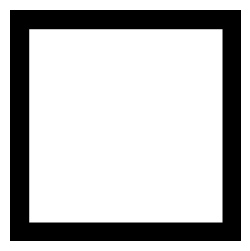

In [78]:
jimshow_channel(rect)

__Circle__

We can get a circular mask in much the same way, this time using ```cv2.circle()```.


In [79]:
# circle
zeros = np.zeros((300, 300), dtype = "uint8")

**Question:** Again, can you explain what this is doing? 

In [80]:
circ = cv2.circle(zeros, (150, 150), 150, 255, -1)

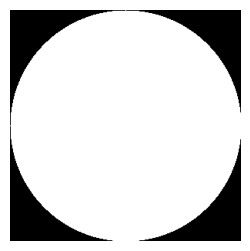

In [81]:
jimshow_channel(circ)

__Rectangle mask__

In [87]:
# Mask should be same shape as image
mask = np.zeros(image.shape[:2], dtype="uint8")

**Question:** What is this cell doing?

In [88]:
mask = cv2.rectangle(mask, (100,100), (200, 200), 255, -1)

**Question:** What do you expect to see here?

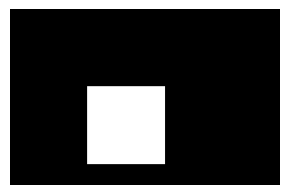

In [89]:
jimshow_channel(mask)

**Question:** And what do you expect to see here?

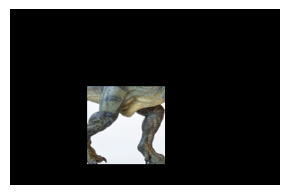

In [90]:
jimshow(cv2.bitwise_and(image, image, mask=mask)) #source and destination (we want to take the image and create a new image, but the same image)

__Circular mask__

**Question:** What do you think this does and what do you expect to see after running the next two cells?

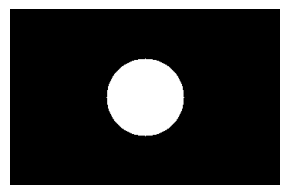

In [69]:
# create mask 'image'
mask = np.zeros(image.shape[:2], dtype = "uint8")
(centre_x, centre_y) = (image.shape[1]//2, image.shape[0]//2)
jimshow_channel(cv2.circle(mask, (centre_x, centre_y), 50, 255, -1))

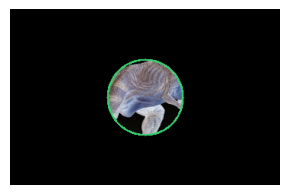

In [74]:
jimshow(cv2.bitwise_and(image, image, mask=mask))

__Load image__

In [ ]:
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))

In [ ]:
jimshow(image, "Original image")

## Exercise

We've now seen how to load images and split them into their separate colour channels. We've also seen how we can use this to extract colour histograms showing distributions of pixel intensities across each channel. Lastly we've seen how we can use this to plot colour histograms for any given image.

- In your groups, rework the code in the cell above into a function which can create a colour histogram for any given image.

## Comparing histograms

We also saw briefly last week in class that we are able to compare images based on their colour histograms. This is something that can be done mathematically in ```OpenCV```. 

Let's load a different image.

In [ ]:
image2 = cv2.imread(os.path.join("..", "data", "img", "t-rex2.png"))

In [ ]:
jimshow(image2, "Image 2")

## Comparing histograms

__Extract histograms__

Last week we saw how to extract histograms from images using ```cv2.calcHist()```, specifically for single channels.

In the lines below, we're ```cv2.calcHist()``` to extract histograms across all three channels.

In [ ]:
hist1 = cv2.calcHist([image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

In [ ]:
hist2 = cv2.calcHist([image2], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

__MinMax normalization__

Before comparing histograms, we first have to *normalise* them to occur within a narrower ranger of values. 

**Question:** Why do think we need to do this?

We're doing to use MinMax normalisation, which we calculate in the following way for each value:

```norm_pixel = (value-min) / (max-min)```

That is to say for every pixel ```value``` we subtract the ```min``` pixel value in the image, then divide that by the ```max``` minus the ```min```. 

In [ ]:
hist1 = cv2.normalize(hist1, hist1, 0, 1.0, cv2.NORM_MINMAX)
hist2 = cv2.normalize(hist2, hist2, 0, 1.0, cv2.NORM_MINMAX)

__Comparing the first two histograms__

We're going to compare images computing the *Chi-Squared distance*, but there are a range of options available via OpenCV. 

You can read more [here](https://pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/).

In [ ]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

__Load a new image__

In [ ]:
image3 = cv2.imread(os.path.join("..", "data", "img", "wave.png"))

In [ ]:
jimshow(image3, "Image 3")

__Compare with image 1__

In [ ]:
hist3 = cv2.calcHist([image3], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
hist3 = cv2.normalize(hist3, hist3, 0, 1.0, cv2.NORM_MINMAX)

We can then show calculate the scores between image and the other images

In [ ]:
round(cv2.compareHist(hist1, hist1, cv2.HISTCMP_CHISQR), 2)

In [ ]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

In [ ]:
round(cv2.compareHist(hist1, hist3, cv2.HISTCMP_CHISQR), 2)

## Exercise

In the shared drive ```cds-vis-data```, you'll find a directory comprising 1360 different images of flowers. Many of these are different images of the same flower.

In groups, do the following activity:

- Pick a random flower from the dataset, load it, and normalize it
- Compare that image's colour histogram to every *other* flower in the dataset
- Print save the filename of the 5 closest images, along with the distance score you calculated
  - **Hint:** use ```pandas```
- Qualitatively inspect the images - how does your algorithm perform?
- Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image

This in-class exercise is going to be *Assignment 1* for Visual Analytics, designing a simple *image search* algorithm. The Github classroom repo for this Assignment will go online later.